In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('star_data.csv')
df.head()


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3042,0.0005,0.1542,16.6,0.0,Red,M,NaN,NaN
2,2600,0.0003,0.102,18.7,0.0,Red,M,NaN,NaN
3,2800,0.0002,,16.65,0.0,Red,M,NaN,NaN
4,1939,0.000138,0.103,20.06,0.0,Red,M,NaN,NaN


In [87]:
df = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class']]
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3042,0.0005,0.1542,16.6,0.0,Red,M
2,2600,0.0003,0.102,18.7,0.0,Red,M
3,2800,0.0002,,16.65,0.0,Red,M
4,1939,0.000138,0.103,20.06,0.0,Red,M


In [88]:
# Replace blank spaces with NaN
df['Star color'] = df['Star color'].replace(' ', np.nan)
# Impute missing values with the mode (most frequent value)
most_common_color = df['Star color'].mode()[0]
df['Star color'].fillna(most_common_color, inplace=True)

print(df['Star color'].unique())

['Red' 'Blue-White' 'White' 'Yellow-White' 'Blue']


C:\Users\jdgar\AppData\Local\Temp\ipykernel_20804\139190354.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Star color'].fillna(most_common_color, inplace=True)


In [89]:
df['Temperature (K)'] = pd.to_numeric(df['Temperature (K)'], errors='coerce')
df['Luminosity(L/Lo)'] = pd.to_numeric(df['Luminosity(L/Lo)'], errors='coerce')
df['Radius(R/Ro)'] = pd.to_numeric(df['Radius(R/Ro)'], errors='coerce')
df['Absolute magnitude(Mv)'] = pd.to_numeric(df['Absolute magnitude(Mv)'], errors='coerce')
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,NaN,NaN,NaN,NaN,NaN,Red,NaN
1,3042.0,0.000500,0.1542,16.60,0.0,Red,M
2,2600.0,0.000300,0.1020,18.70,0.0,Red,M
3,2800.0,0.000200,NaN,16.65,0.0,Red,M
4,1939.0,0.000138,0.1030,20.06,0.0,Red,M


In [90]:
df.dropna(inplace=True)
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
1,3042.0,0.000500,0.1542,16.60,0.0,Red,M
2,2600.0,0.000300,0.1020,18.70,0.0,Red,M
4,1939.0,0.000138,0.1030,20.06,0.0,Red,M
6,2637.0,0.000730,0.1270,17.22,0.0,Red,M
7,2600.0,0.000400,0.0960,17.40,0.0,Red,M


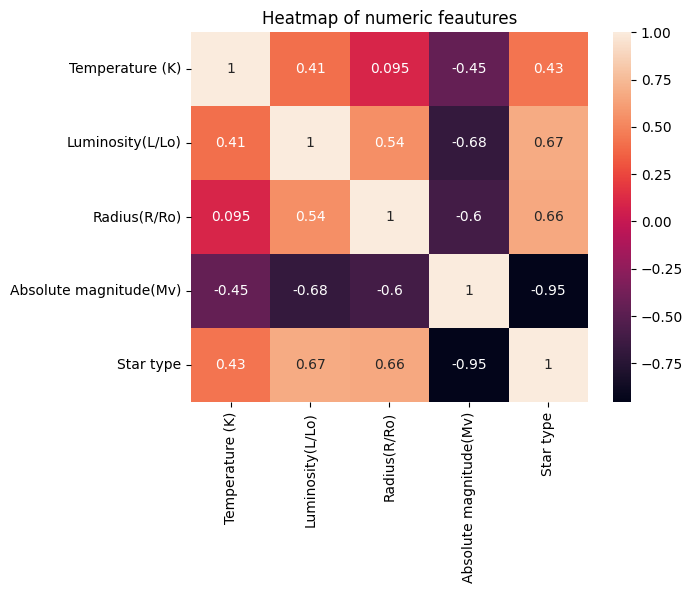

In [91]:
df_nums = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type']]

sns.heatmap(df_nums.corr(), annot=True)
plt.title('Heatmap of numeric feautures')
plt.show()

## Portafolio 1
En esta seccion esta la implementacion de uno de los algoritmos vistos en el módulo sin uso de ninguna biblioteca o framework de aprendizaje máquina, ni de estadística avanzada. Lo que se busca es que se implemente manualmente el algoritmo.

In [92]:
import math

def sigmoid_function(X):
  return 1/(1+math.e**(-X))

def log_regression4(X, y, alpha, epochs):
  y_ = np.reshape(y, (len(y), 1)) # shape (150,1)
  N = len(X)
  theta = np.random.randn(len(X[0]) + 1, 1) #* initialize theta
  X_vect = np.c_[np.ones((len(X), 1)), X] #* Add x0 (column of 1s)
  avg_loss_list = []
  loss_last_epoch = 9999999
  for epoch in range(epochs):
    sigmoid_x_theta = sigmoid_function(X_vect.dot(theta)) # shape: (150,5).(5,1) = (150,1)
    grad = (1/N) * X_vect.T.dot(sigmoid_x_theta - y_) # shapes: (5,150).(150,1) = (5, 1)
    best_params = theta
    theta = theta - (alpha * grad)
    hyp = sigmoid_function(X_vect.dot(theta)) # shape (150,5).(5,1) = (150,1)
    avg_loss = -np.sum(np.dot(y_.T, np.log(hyp) + np.dot((1-y_).T, np.log(1-hyp)))) / len(hyp)
    # if epoch % 50 == 0:
    #   print('epoch: {} | avg_loss: {}'.format(epoch, avg_loss))
    #   print('')
    avg_loss_list.append(avg_loss)
    loss_step = abs(loss_last_epoch - avg_loss) #*
    loss_last_epoch = avg_loss #*
    # if loss_step < 0.001: #*
    #   # print('\nStopping training on epoch {}/{}, as (last epoch loss - current epoch loss) is less than 0.001 [{}]'.format(epoch, epochs, loss_step)) #*
    #   break #*
  # plt.plot(np.arange(1, epoch+1), avg_loss_list[1:], color='red')
  # plt.title('Cost function')
  # plt.xlabel('Epochs')
  # plt.ylabel('Cost')
  # plt.show()
  return best_params

In [11]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Dataset
# iris = datasets.load_iris()
# Define X features
data = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']].to_numpy()
target = df['Star type'].to_numpy()
# print(iris['Star type'])
# Define binary Star type 'y' based on iris plant type
#0-Brown Dwarf, 1-Red Dwarf, 2-White Dwarf, 3-Main Sequence, 4-Supergiants, 5-Hypergiants
y_Brown_Dwarf = (target == 0).astype(int) 
y_Red_Dwarf = (target == 1).astype(int)
y_White_Dwarf = (target == 2).astype(int)
y_Main_Sequence = (target == 3).astype(int)
y_Supergiants = (target == 4).astype(int)
y_Hypergiants = (target == 5).astype(int)
# List of ys
y_iris_types = [y_Brown_Dwarf, y_Red_Dwarf, y_White_Dwarf, y_Main_Sequence, y_Supergiants, y_Hypergiants]
y_iris_types = {
    'Brown Dwarf': y_Brown_Dwarf,
    'Red Dwarf': y_Red_Dwarf,
    'White Dwarf': y_White_Dwarf,
    'Main Sequence': y_Main_Sequence,
    'Supergiants': y_Supergiants,
    'Hypergiants': y_Hypergiants
}
predicted_probs = {
    'Brown Dwarf': 0,
    'Red Dwarf': 0,
    'White Dwarf': 0,
    'Main Sequence': 0,
    'Supergiants': 0,
    'Hypergiants': 0
}
actual_y = {
    'Brown Dwarf': 0,
    'Red Dwarf': 0,
    'White Dwarf': 0,
    'Main Sequence': 0,
    'Supergiants': 0,
    'Hypergiants': 0
}
for key, y_iris_type in y_iris_types.items():
  # Split dataset (training and testing sets)
  X_train, X_test, y_train, y_test = train_test_split(data, y_iris_type, test_size=0.2, random_state=0)
  # Scale X
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  # Train model
  epochs = 1000
  alpha = 1
  best_params = log_regression4(X_train, y_train, alpha, epochs)
  # Make predictions on test set
  index_ = 5
  X_to_predict = [list(X_test[index_])]
  # print(X_to_predict)
  X_to_predict = np.c_[np.ones((len(X_to_predict), 1)), X_to_predict] # add x0 for bias
  # print(X_to_predict)
  pred_probability = sigmoid_function(X_to_predict.dot(best_params))
  predicted_probs[key] = pred_probability[0][0]
  print('Our model calculated probability of sample being {}, is: {}%'.format(key, round(pred_probability[0][0]*100,2)))
  actual_y[key] = y_test[index_]

max_key = max(predicted_probs, key=predicted_probs.get)
print('\n', predicted_probs)
print('\nModel Prediction: {}'.format(max_key))
max_actual_y = max(actual_y, key=actual_y.get)
print('Real value is: {}'.format(max_actual_y))

Our model calculated probability of sample being Brown Dwarf, is: 0.0%
Our model calculated probability of sample being Red Dwarf, is: 0.0%
Our model calculated probability of sample being White Dwarf, is: 25.47%
Our model calculated probability of sample being Main Sequence, is: 47.25%
Our model calculated probability of sample being Supergiants, is: 17.64%
Our model calculated probability of sample being Hypergiants, is: 0.11%

 {'Brown Dwarf': 9.709328343338541e-12, 'Red Dwarf': 1.3848523420657448e-11, 'White Dwarf': 0.25465275159873196, 'Main Sequence': 0.4724533168039277, 'Supergiants': 0.17642078311974013, 'Hypergiants': 0.0010917639549296442}

Model Prediction: Main Sequence
Real value is: Main Sequence


## Portafolio 2

En esta seccion encontramos el algoritmo de Random Forest haciendo uso de una biblioteca y framework de aprendizaje máquina. Lo que se busco fue demostrar el conocimiento sobre el framework y como configurar el algoritmo. 
Se ha probado la implementación con el set de datos de Estrellas y se han realizado algunas predicciones.


In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report

x = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']].to_numpy(float)
y = df['Star type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = RandomForestClassifier().fit(x_train, y_train)
y_pred = model.predict(x_test)

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=2,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    random_state=21
)

# Ajustar el modelo a los datos de entrenamiento
model.fit(x_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(x_test)

# Métricas
print('Score de exactitud:', accuracy_score(y_test, y_pred))
print('Score de precisión:', precision_score(y_test, y_pred, average='weighted'))
print('Score f1:', f1_score(y_test, y_pred, average='weighted'))
print('Score de recall:', recall_score(y_test, y_pred, average='weighted'))

# Matriz de confusión
mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{mat}')

# Reporte de clasificación
reporte = classification_report(y_test, y_pred)
print(f'Classification Report:\n{reporte}')

Score de exactitud: 0.9772727272727273
Score de precisión: 0.9801136363636364
Score f1: 0.9772727272727273
Score de recall: 0.9772727272727273
Confusion Matrix:
[[5 0 0 0 0 0]
 [0 9 0 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 7 0 0]
 [0 0 0 1 7 0]
 [0 0 0 0 0 9]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00         6
         3.0       0.88      1.00      0.93         7
         4.0       1.00      0.88      0.93         8
         5.0       1.00      1.00      1.00         9

    accuracy                           0.98        44
   macro avg       0.98      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



## Crossvalidation

In [94]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Scores: {scores}')
print(f'Average Cross-Validation Score: {scores.mean()}')

Cross-Validation Scores: [1.         0.90909091 1.         1.         1.        ]
Average Cross-Validation Score: 0.9818181818181818


## Analisis
----

In [108]:
# Dividir el conjunto de entrenamiento en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=0)  # 0.25 * 0.8 = 0.2 del total

# Crear y ajustar el modelo a los datos de entrenamiento
random_forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=2,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    random_state=21
)

random_forest.fit(x_train, y_train)

# Hacer predicciones en el conjunto de validación
y_val_pred = random_forest.predict(x_val)

# Evaluar el rendimiento en el conjunto de validación
print('Score de exactitud en validación:', accuracy_score(y_val, y_val_pred))
print('Score de precisión en validación:', precision_score(y_val, y_val_pred, average='weighted'))
print('Score f1 en validación:', f1_score(y_val, y_val_pred, average='weighted'))
print('Score de recall en validación:', recall_score(y_val, y_val_pred, average='weighted'), '\n')

# Evaluar el modelo con el conjunto de prueba
y_test_pred = random_forest.predict(x_test)

print('Score de exactitud en prueba:', accuracy_score(y_test, y_test_pred))
print('Score de precisión en prueba:', precision_score(y_test, y_test_pred, average='weighted'))
print('Score f1 en prueba:', f1_score(y_test, y_test_pred, average='weighted'))
print('Score de recall en prueba:', recall_score(y_test, y_test_pred, average='weighted'), '\n')

# Matriz de confusión en el conjunto de prueba
mat = confusion_matrix(y_test, y_test_pred)
print(f'Matriz de confusión en prueba:\n{mat}')

# Reporte de clasificación en el conjunto de prueba
reporte = classification_report(y_test, y_test_pred)
print(f'Reporte de clasificación en prueba:\n{reporte}')


Score de exactitud en validación: 1.0
Score de precisión en validación: 1.0
Score f1 en validación: 1.0
Score de recall en validación: 1.0 

Score de exactitud en prueba: 0.9772727272727273
Score de precisión en prueba: 0.9801136363636364
Score f1 en prueba: 0.9772727272727273
Score de recall en prueba: 0.9772727272727273 

Matriz de confusión en prueba:
[[5 0 0 0 0 0]
 [0 9 0 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 7 0 0]
 [0 0 0 1 7 0]
 [0 0 0 0 0 9]]
Reporte de clasificación en prueba:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00         6
         3.0       0.88      1.00      0.93         7
         4.0       1.00      0.88      0.93         8
         5.0       1.00      1.00      1.00         9

    accuracy                           0.98        44
   macro avg       0.98      0.98      0.98        44
weighted avg       0.98     

## Diagnostico
---

In [104]:
from sklearn.metrics import accuracy_score

def accuracy(Y_train, Y_pred, X_train, Modelo, Y_test):
    # Performance en el conjunto de entrenamiento
    y_train_pred = Modelo.predict(X_train)
    train_accuracy = accuracy_score(Y_train, y_train_pred)

    # Performance en el conjunto de prueba
    test_accuracy = accuracy_score(Y_test, Y_pred)

    print(f"Accuracy en el conjunto de entrenamiento: {train_accuracy:.4f}")
    print(f"Accuracy en el conjunto de prueba: {test_accuracy:.4f}")

    # Evaluar el sesgo y la varianza
    if train_accuracy > test_accuracy:
        print("Hay una posible alta varianza (overfitting).")
    elif train_accuracy < test_accuracy:
        print("Hay un posible alto sesgo (underfitting).")
    else:
        print("El modelo tiene un buen equilibrio entre sesgo y varianza.")

accuracy(y_train, y_test_pre, x_train, random_forest, y_test)

Accuracy en el conjunto de entrenamiento: 1.0000
Accuracy en el conjunto de prueba: 0.9773
Hay una posible alta varianza (overfitting).


## Refinamiento y Ajuste de parametros
---

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el espacio de hiperparámetros a explorar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crear el modelo de Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Configurar la búsqueda en rejilla
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Ajustar el modelo a los datos
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

Mejores hiperparámetros encontrados: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


c:\Users\jdgar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
321 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jdgar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jdgar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\jdgar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\bas

In [110]:

# Crear y ajustar el modelo con los mejores hiperparámetros
model_op = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

model_op.fit(x_train, y_train)

# Hacer predicciones en el conjunto de validación
y_val_pred = model_op.predict(x_val)

# Evaluar el rendimiento en el conjunto de validación
print('Score de exactitud en validación:', accuracy_score(y_val, y_val_pred))
print('Score de precisión en validación:', precision_score(y_val, y_val_pred, average='weighted'))
print('Score f1 en validación:', f1_score(y_val, y_val_pred, average='weighted'))
print('Score de recall en validación:', recall_score(y_val, y_val_pred, average='weighted'), '\n')

# Evaluar el modelo con el conjunto de prueba
y_test_pred = model_op.predict(x_test)

print('Score de exactitud en prueba:', accuracy_score(y_test, y_test_pred))
print('Score de precisión en prueba:', precision_score(y_test, y_test_pred, average='weighted'))
print('Score f1 en prueba:', f1_score(y_test, y_test_pred, average='weighted'))
print('Score de recall en prueba:', recall_score(y_test, y_test_pred, average='weighted'), '\n')

# Matriz de confusión en el conjunto de prueba
mat = confusion_matrix(y_test, y_test_pred)
print(f'Matriz de confusión en prueba:\n{mat}')

# Reporte de clasificación en el conjunto de prueba
reporte = classification_report(y_test, y_test_pred)
print(f'Reporte de clasificación en prueba:\n{reporte}')


Score de exactitud en validación: 1.0
Score de precisión en validación: 1.0
Score f1 en validación: 1.0
Score de recall en validación: 1.0 

Score de exactitud en prueba: 1.0
Score de precisión en prueba: 1.0
Score f1 en prueba: 1.0
Score de recall en prueba: 1.0 

Matriz de confusión en prueba:
[[5 0 0 0 0 0]
 [0 9 0 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 7 0 0]
 [0 0 0 0 8 0]
 [0 0 0 0 0 9]]
Reporte de clasificación en prueba:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00         6
         3.0       1.00      1.00      1.00         7
         4.0       1.00      1.00      1.00         8
         5.0       1.00      1.00      1.00         9

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



## Evaluacion
---

In [111]:
accuracy(y_train, y_test_pred, x_train, model_op, y_test)

Accuracy en el conjunto de entrenamiento: 1.0000
Accuracy en el conjunto de prueba: 1.0000
El modelo tiene un buen equilibrio entre sesgo y varianza.


In [112]:
scores = cross_val_score(model_op, x, y, cv=5) 
print(f'Cross-Validation Scores: {scores}')
print(f'Average Cross-Validation Score: {scores.mean()}')

Cross-Validation Scores: [1.         0.95454545 1.         1.         1.        ]
Average Cross-Validation Score: 0.990909090909091
